## **EDA Feature Analysis**
Goal: 

    → Analyze engineered features (AQI, derived, time-based)
    → detect redundant or low-importance ones
    → finalize feature set before upload to Hopsworks

In [ ]:

# Setup 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the engineered dataset
file_path = "../data/final/final_features.csv"
df = pd.read_csv(file_path)

print("✅ Data loaded successfully!")
print("Shape:", df.shape)
df.head()

✅ Data loaded successfully!
Shape: (15744, 40)


,datetime,pm10,pm2_5,carbon_monoxide,nitrogen_dioxide,ozone,sulphur_dioxide,temperature_2m,relative_humidity_2m,wind_speed_10m,...,aqi_roll_mean_3h,aqi_roll_mean_6h,aqi_rolling_24h,aqi_lag_1h,aqi_lag_3h,aqi_lag_6h,pm_ratio,temp_humidity_ratio,wind_effect,high_pollution_flag
0,2024-01-01 00:00:00,68.9,46.2,598.0,6.7,97.0,19.9,15.3,65,11.9,...,127.000000,127.000000,127.000000,127.0,127.0,127.0,0.670537,0.235385,5.769234,0
1,2024-01-01 01:00:00,70.1,47.1,689.0,14.8,89.0,20.4,15.0,67,12.4,...,128.500000,128.500000,128.500000,127.0,127.0,127.0,0.671897,0.223881,6.200000,0
2,2024-01-01 02:00:00,72.6,49.1,812.0,25.8,78.0,21.2,14.7,68,12.6,...,130.333333,130.333333,130.333333,130.0,127.0,127.0,0.676309,0.216176,6.489480,0
3,2024-01-01 03:00:00,76.1,51.8,887.0,31.8,77.0,22.2,15.2,66,13.0,...,135.000000,133.000000,133.000000,134.0,127.0,127.0,0.680683,0.230303,8.181165,0
4,2024-01-01 04:00:00,77.5,53.0,872.0,28.3,95.0,23.6,17.6,57,12.0,...,139.666667,135.200000,135.200000,141.0,130.0,127.0,0.683871,0.308772,8.632078,0


## **1. Data Exploration**

In [45]:
# Info summary
df.info()

# Missing values
print("\nMissing Values:\n", df.isna().sum())

# Duplicates
print("\nDuplicates:", df.duplicated().sum())

# Basic statistics
df.describe().T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15744 entries, 0 to 15743
Data columns (total 40 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   datetime              15744 non-null  object 
 1   pm10                  15744 non-null  float64
 2   pm2_5                 15744 non-null  float64
 3   carbon_monoxide       15744 non-null  float64
 4   nitrogen_dioxide      15744 non-null  float64
 5   ozone                 15744 non-null  float64
 6   sulphur_dioxide       15744 non-null  float64
 7   temperature_2m        15744 non-null  float64
 8   relative_humidity_2m  15744 non-null  int64  
 9   wind_speed_10m        15744 non-null  float64
 10  wind_direction_10m    15744 non-null  int64  
 11  month                 15744 non-null  int64  
 12  aqi_pm25              15744 non-null  float64
 13  aqi_pm10              15744 non-null  float64
 14  no2_ppb               15744 non-null  int64  
 15  o3_ppb             

,count,mean,std,min,25%,50%,75%,max
pm10,15744.0,6.275333e+01,34.736644,14.943000,39.600000,5.440000e+01,77.100000,205.913000
pm2_5,15744.0,2.676841e+01,12.046232,9.100000,18.500000,2.380000e+01,31.800000,70.214000
carbon_monoxide,15744.0,4.247729e+02,345.184819,122.430000,209.000000,2.870000e+02,508.000000,1879.570000
nitrogen_dioxide,15744.0,1.850427e+01,17.073558,0.700000,7.300000,1.260000e+01,23.400000,154.100000
ozone,15744.0,7.206809e+01,38.090515,0.000000,45.000000,6.300000e+01,94.000000,240.000000
sulphur_dioxide,15744.0,1.224247e+01,7.689737,2.300000,6.000000,1.060000e+01,15.900000,60.600000
temperature_2m,15744.0,2.702730e+01,4.776608,10.000000,24.500000,2.790000e+01,30.200000,41.600000
relative_humidity_2m,15744.0,6.633200e+01,21.127922,5.000000,54.000000,7.100000e+01,83.000000,100.000000
wind_speed_10m,15744.0,1.389628e+01,6.706147,0.000000,8.900000,1.290000e+01,17.800000,46.600000
wind_direction_10m,15744.0,2.257355e+02,85.282230,1.000000,221.000000,2.510000e+02,272.000000,360.000000


## **2. Correlation checks**


Correlation Matrix:
                           pm10     pm2_5  carbon_monoxide  nitrogen_dioxide  \
pm10                  1.000000  0.533138        -0.062965         -0.038542   
pm2_5                 0.533138  1.000000         0.584294          0.491718   
carbon_monoxide      -0.062965  0.584294         1.000000          0.748674   
nitrogen_dioxide     -0.038542  0.491718         0.748674          1.000000   
ozone                 0.113693  0.034418        -0.137983         -0.481662   
sulphur_dioxide       0.047947  0.548530         0.581271          0.378492   
temperature_2m        0.231792 -0.342468        -0.514451         -0.494749   
relative_humidity_2m -0.053569 -0.240167        -0.268505          0.010810   
wind_speed_10m        0.176822 -0.285388        -0.519552         -0.486464   
wind_direction_10m    0.041870 -0.320256        -0.364068         -0.118666   
month                -0.071224 -0.089179        -0.073578         -0.087011   
aqi_pm25              0.535748

C:\Users\HP\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


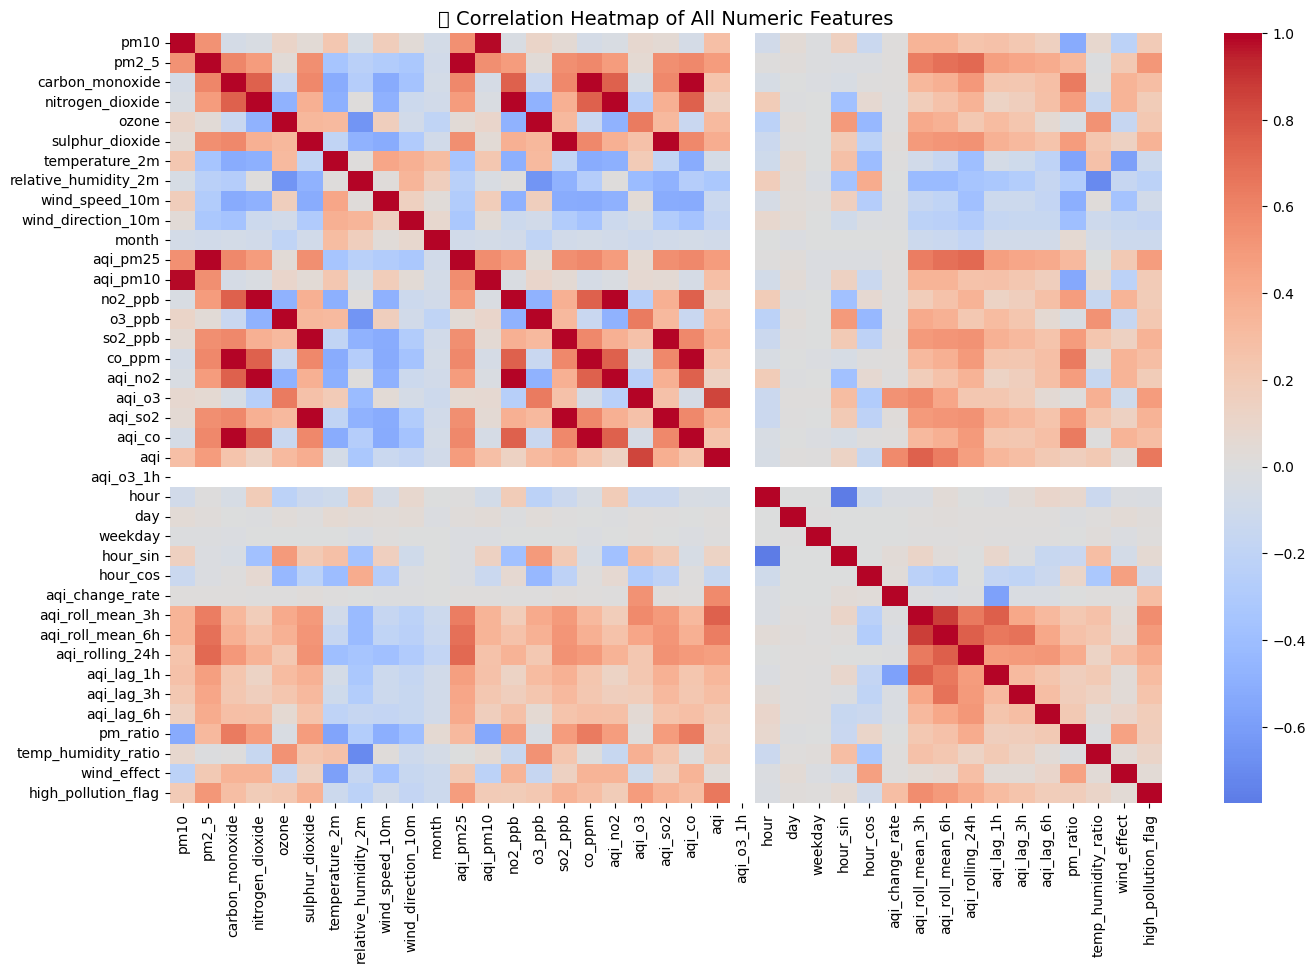

In [ ]:
# Correlation Heatmap (for numeric features)
numeric_cols = df.select_dtypes(include=[np.number]).columns
numeric_cols_corr = df[numeric_cols].corr()
print("\nCorrelation Matrix:\n", numeric_cols_corr)
plt.figure(figsize=(16, 10))
sns.heatmap(numeric_cols_corr, cmap="coolwarm", center=0, annot=False)
plt.title("🔍 Correlation Heatmap of All Numeric Features", fontsize=14)
plt.show()

### **Insights from Correlation Analysis**

- **Strongest pollutant impact:** PM2.5 (ρ = 0.48) → Main driver of AQI in Karachi.  
- **Moderate contributors:** PM10, O₃, SO₂, and CO show medium correlation.  
- **Meteorological influence:** Temperature, humidity, and wind speed inversely affect AQI — higher dispersion = cleaner air.  
- **Time-based patterns:** Hourly and cyclical encodings (hour_sin, hour_cos) useful for temporal variation.  
- **Redundancy detected:**  
  - Rolling and lag features (6h, 24h) are strongly correlated with shorter ones (3h, 1h).  
  - AQI sub-indices duplicate information from the main AQI metric.  
  - `aqi_o3_1h` constant at 500 → drop.  
  - `wind_direction_10m` weakly correlated → drop. 

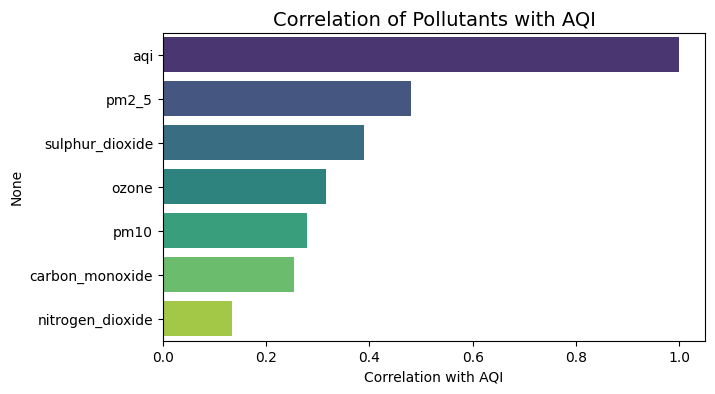

aqi                 1.000000
pm2_5               0.481015
sulphur_dioxide     0.390177
ozone               0.314960
pm10                0.278680
carbon_monoxide     0.254412
nitrogen_dioxide    0.134531
Name: aqi, dtype: float64

In [ ]:
# Check correlation of pollutants vs AQI 
pollutants = ['pm10','pm2_5','carbon_monoxide','nitrogen_dioxide','ozone','sulphur_dioxide']
corr_pollutants = df[pollutants + ['aqi']].corr()['aqi'].sort_values(ascending=False)

plt.figure(figsize=(7,4))
sns.barplot(x=corr_pollutants.values, y=corr_pollutants.index, palette="viridis", hue=corr_pollutants.index)
plt.title("Correlation of Pollutants with AQI", fontsize=14)
plt.xlabel("Correlation with AQI")
plt.show()

corr_pollutants

### **Insights after Pollutant–AQI Correlation**

- The strongest correlation with AQI is observed for **PM2.5 (r = 0.48)**, confirming that fine particulate matter is the **primary driver** of air quality degradation in Karachi.
- **Sulphur Dioxide (SO₂)** also shows a **moderate correlation (r = 0.39)**, suggesting notable industrial or vehicular influence.
- **Ozone (O₃)** correlates at **r = 0.31**, reflecting its role as a **secondary pollutant** formed from photochemical reactions.
- **PM10** and **Carbon Monoxide (CO)** show weaker but still positive correlations (**r = 0.27** and **r = 0.25**), indicating their partial contribution to AQI fluctuations.
- **Nitrogen Dioxide (NO₂)** has the **lowest correlation (r = 0.13)**, implying that while it contributes to pollution levels, its direct variation with AQI is limited in this dataset.

*Interpretation:*  
These correlations align with typical urban air quality trends — **PM2.5 dominates AQI influence**, followed by **SO₂ and O₃**, while gases like **NO₂ and CO** play smaller roles.


## **3. Temporal Patterns Exploration**

📊 Average AQI by Hour:
hour
0      76.58
1      76.63
2      81.27
3      87.85
4      88.96
5      92.61
6     100.27
7     111.27
8     118.46
9     110.11
10    113.69
11    105.65
12     96.38
13     88.19
14     86.54
15     86.03
16     86.51
17     86.29
18     85.76
19     85.64
20     83.09
21     80.78
22     79.77
23     77.55
Name: aqi, dtype: float64

📆 Average AQI by Month:
month
1     126.42
2     100.02
3      92.12
4      86.30
5      76.92
6      80.27
7      89.13
8      74.59
9      72.25
10     96.47
11     97.67
12    118.93
Name: aqi, dtype: float64


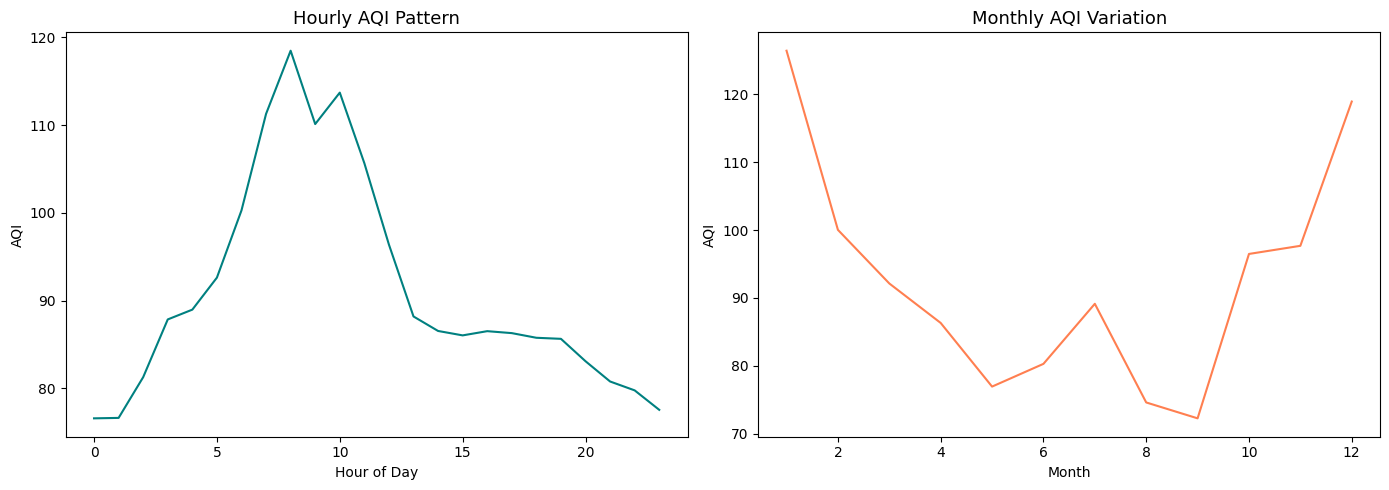

In [ ]:
# Time-based pattern exploration
df["datetime"] = pd.to_datetime(df["datetime"])
df["hour"] = df["datetime"].dt.hour
df["month"] = df["datetime"].dt.month

hourly_aqi = df.groupby("hour")["aqi"].mean().round(2)
monthly_aqi = df.groupby("month")["aqi"].mean().round(2)

print("📊 Average AQI by Hour:")
print(hourly_aqi)

print("\n📆 Average AQI by Month:")
print(monthly_aqi)

fig, axes = plt.subplots(1, 2, figsize=(14, 5)) 

# Hourly pattern
sns.lineplot(data=df, x="hour", y="aqi", ax=axes[0], color="teal", errorbar=None)
axes[0].set_title("Hourly AQI Pattern", fontsize=13)
axes[0].set_xlabel("Hour of Day")
axes[0].set_ylabel("AQI")

# Monthly pattern
sns.lineplot(data=df, x="month", y="aqi", ax=axes[1], color="coral", errorbar=None)
axes[1].set_title("Monthly AQI Variation", fontsize=13)
axes[1].set_xlabel("Month")
axes[1].set_ylabel("AQI")

plt.tight_layout()
plt.show()


### **Insights after Time-Based AQI Analysis**

#### **Hourly AQI Pattern**
- AQI **gradually rises after 3 AM**, peaking around **8 AM (≈ 118)** — likely due to **morning traffic emissions** and **temperature inversion** trapping pollutants near the ground.  
- After sunrise, dispersion improves, causing AQI to **drop to ~85–90** during afternoon hours.  
- AQI again slightly increases in the **evening (6–9 PM)** because of rush-hour activity before stabilizing at night.

#### **Monthly AQI Variation**
- The **highest AQI levels** are recorded in **January (126)** and **December (119)**, showing **winter pollution peaks** due to colder, stagnant air and increased fuel use.  
- **Lowest AQI** occurs in **September (72)** and **August (74)**, reflecting **better air dispersion** during the monsoon season.  
- The trend shows a **clear seasonal cycle** — pollution worsens in **winter months (Nov–Feb)** and improves in **mid-year (May–Sep)**.

*Interpretation:*  
The AQI in Karachi exhibits both **diurnal** and **seasonal variations** — driven by **traffic intensity**, **meteorological stability**, and **seasonal wind patterns**.

## **4. Feature Redundancy Check**

In [ ]:
# Feature redundancy check
corr_matrix = df.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
high_corr_features = [column for column in upper.columns if any(upper[column] > 0.9)]

print("🔁 Highly correlated (redundant) features:\n", high_corr_features)

🔁 Highly correlated (redundant) features:
 ['aqi_pm25', 'aqi_pm10', 'no2_ppb', 'o3_ppb', 'so2_ppb', 'co_ppm', 'aqi_no2', 'aqi_so2', 'aqi_co']


### **Insights after Feature Redundancy Check**

- **9 redundant features (|r| > 0.9)** detected — mainly pollutant-level AQI columns overlapping with final `aqi`.
- **Unit-converted** columns were only used for AQI computation and add no new information.
- Since **raw pollutant values** already capture gas concentrations, these redundant columns can be **safely dropped** to minimize noise and multicollinearity.

## **5. Low-Variance Check**

In [ ]:
# Detect low variance or constant features
low_var = df[numeric_cols].nunique()
low_var_features = low_var[low_var == 1].index.tolist()
print("Low variance features (constant or near-constant):", low_var_features)

Low variance features (constant or near-constant): ['aqi_o3_1h']


## **6. Outlier Visualization**

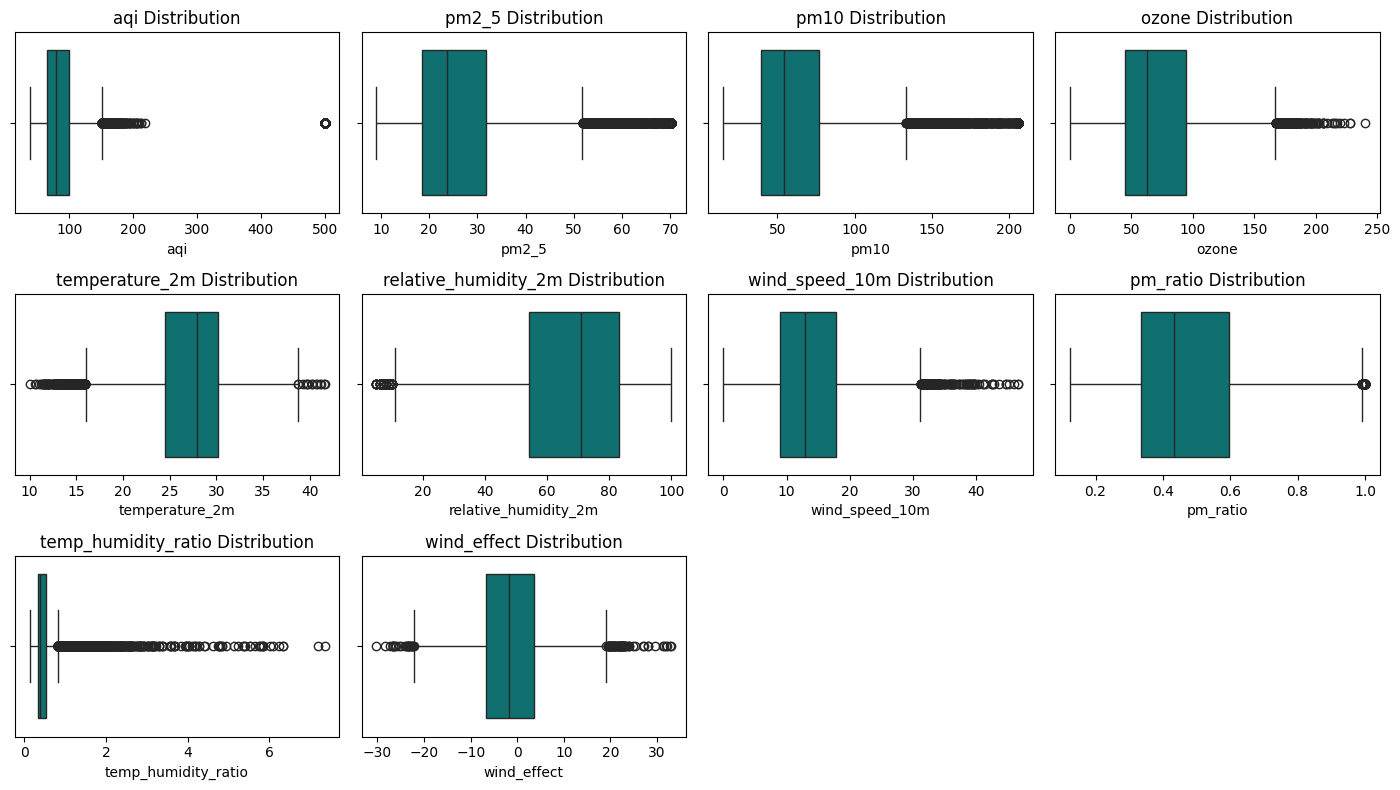

                Feature  Lower_Bound  Upper_Bound  Outlier_Count  Outlier_%
0                   aqi        40.00       500.00            143       0.91
1                 pm2_5         9.10        70.16            158       1.00
2                  pm10        14.97       205.69            316       2.01
3                 ozone         8.00       174.00            283       1.80
4        temperature_2m        14.50        36.10            307       1.95
5  relative_humidity_2m        13.43        96.00            271       1.72
6        wind_speed_10m         2.30        32.06            305       1.94
7              pm_ratio         0.19         0.99            316       2.01
8   temp_humidity_ratio         0.20         2.20            316       2.01
9           wind_effect       -17.50        14.37            316       2.01


In [ ]:
# Outlier visualization (key features) 
key_feats = [
    'aqi', 'pm2_5', 'pm10', 'ozone',
    'temperature_2m', 'relative_humidity_2m',
    'wind_speed_10m', 'pm_ratio',
    'temp_humidity_ratio', 'wind_effect'
]
plt.figure(figsize=(14,8))
for i, feat in enumerate(key_feats, 1):
    plt.subplot(3, 4, i)
    sns.boxplot(x=df[feat], color='teal')
    plt.title(f"{feat} Distribution")
plt.tight_layout()
plt.show()

def outlier_summary_percentile(df, columns, lower_pct=0.01, upper_pct=0.99):
    results = []
    for col in columns:
        lower = df[col].quantile(lower_pct)
        upper = df[col].quantile(upper_pct)
        outliers = df[(df[col] < lower) | (df[col] > upper)]
        count = len(outliers)
        perc = (count / len(df)) * 100
        results.append({
            "Feature": col,
            "Lower_Bound": round(lower, 2),
            "Upper_Bound": round(upper, 2),
            "Outlier_Count": count,
            "Outlier_%": round(perc, 2)
        })
    return pd.DataFrame(results)

key_feats = [
    'aqi', 'pm2_5', 'pm10', 'ozone',
    'temperature_2m', 'relative_humidity_2m',
    'wind_speed_10m', 'pm_ratio',
    'temp_humidity_ratio', 'wind_effect'
]

outlier_table = outlier_summary_percentile(df, key_feats)
print(outlier_table)



### **Insights after Outlier Visualization**

* Most features show **<2% outliers**, confirming stable distributions.
* Key pollutants (`PM10`, `PM2.5`, `Ozone`, `Temperature_2m`) had minor outliers already **handled during EDA 1 (1st–99th percentile capping)**.
* Derived features (`pm_ratio`, `temp_humidity_ratio`, `wind_effect`) stay within normal ranges — **no extreme deviations**.
* `AQI` outliers (~0.9%) reflect real pollution spikes — **should be retained**.
* Overall dataset is **clean and modeling-ready**; no further outlier treatment needed.

## **7. Drop Irrelavant Features**

In [54]:
drop_cols = [
    # Redundant pollutant sub-indices
    'aqi_pm25', 'aqi_pm10', 'no2_ppb', 'o3_ppb', 'so2_ppb', 'co_ppm',
    'aqi_no2', 'aqi_so2', 'aqi_co','aqi_o3',
    
    # Weak correlation or duplication
    'wind_direction_10m', 'hour_cos', 'aqi_o3_1h',
    
    # Redundant time-based features (keep 24h roll & 1h lag only)
    'aqi_roll_mean_3h', 'aqi_roll_mean_6h', 'aqi_lag_3h', 'aqi_lag_6h'
]

df_refined = df.drop(columns=[col for col in drop_cols if col in df.columns])
print("Final shape after dropping:", df_refined.shape)
print("Remaining features:\n", df_refined.columns.tolist())
print(df['datetime'].dtype)

out_path = "../data/final/final_selected_features.csv"
df_refined.to_csv(out_path, index=False)
print(f"✅ Refined dataset saved → {out_path}")

Final shape after dropping: (15744, 23)
Remaining features:
 ['datetime', 'pm10', 'pm2_5', 'carbon_monoxide', 'nitrogen_dioxide', 'ozone', 'sulphur_dioxide', 'temperature_2m', 'relative_humidity_2m', 'wind_speed_10m', 'month', 'aqi', 'hour', 'day', 'weekday', 'hour_sin', 'aqi_change_rate', 'aqi_rolling_24h', 'aqi_lag_1h', 'pm_ratio', 'temp_humidity_ratio', 'wind_effect', 'high_pollution_flag']
datetime64[ns]
✅ Refined dataset saved → ../data/final/final_selected_features.csv


### **Insights after Feature Removal**

- Removed **redundant pollutant sub-index and unit conversion columns** that overlapped with `AQI`.
- Dropped **weakly correlated features** (`wind_direction_10m`, `hour_cos`, `aqi_o3_1h`) to reduce noise.
- Retained only **one short-term rolling and lag feature** (`aqi_rolling_24h`, `aqi_lag_1h`) for temporal dynamics.
- Final dataset now focuses on **core pollutant, meteorological, and engineered AQI trend features**, ensuring a compact and efficient feature set for model training.